In [2]:
# We need to train a linear regresssion model
# How?:
##|training a model means setting its parameters so that the model best fits the training set. 
##|- For this purpose, we first need a measure of how well (or poorly) the model fits the training data. 
##|- The most common performance measure of a regression model is the Root Mean Square Error (RMSE). 
##|- Therefore, to train a Linear Regression model, we need to find the value of θ (theta = weights/coefficients) that minimizes the RMSE. 
##|- In practice, it is simpler to minimize the mean squared error (MSE) than the RMSE, and it leads to the same result 
#########|- (because the value that minimizes afunction also minimizes its square root).


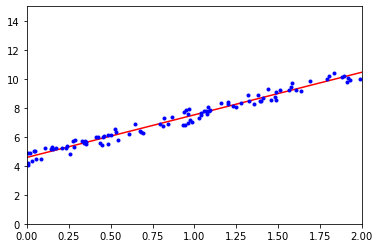

array([[4.58067362],
       [2.93622574]])

In [ ]:
# The Normal Eqn
####|- See Moore-Penrose Pseudo-inverse for Min. Norm. Least squares soln. (pg 13, ch2. Math for ML - OneNote)


#Let’s generate some linear-looking data to test this equation:

import numpy as np

x= 2 * np.random.rand(100,1)      # "np.random.rand(100, 1)" -> generates a 100x1 array of random numbers between 0 (inclusive) and 1 (exclusive) following a uniform distribution 
                                  # "2 *" -> multiplies each element in the array by 2, resulting in values b/w 0 and 2

y = 4 + 3 * x + np.random.rand(100,1)      # creating linear rel. b/w y and x + random noise (np.random.rand(100,1) )
                                           
    
# Now let’s compute bar(θ ) (bar(theta) = weights vector -> and soln of the least sq. mthd) using the Normal Equation. 
# We will use the inv() function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

x_b = np.c_[np.ones((100, 1)), x]   ## add x0 = 1 to each instance -> # "np.ones((100, 1))" creates a 100x1 array filled with ones. 
                                                                      # This represents the bias term (x0) in linear regression, which is typically set to 1 for all data points
                                                                      # "np.c_[..., ...]" combines arrays column-wise (c stands for column). 
                                                                      ####|- Here, it combines the array of ones with the original 'x' features, creating a new 100x2 array where the first column is always 1....
                                                                      ########| - ....and the second column is the original feature value.
                                                            

theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)   # This formula is the same as the normal eqn (i.e. least sq. soln)

# The function that we used to generate the data is y = 4 + 3x_1 + Gaussian noise (see y above).

#theta_best #***running at this point (take out has sign at the strt of this line) gives coeff. = 4.446; 3.0499

# We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.446 and θ1 = 3.0499. 
# Close enough, but the noise made it impossible to recover the exact parameters of the original function.

# Now we can make predictions using bar(θ):

x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)), x_new]  # add x0 = 1 to each instance
y_predict = x_new_b.dot(theta_best)             #****Math is basically 2x2 matrix * 2x1 matrix


#y_predict

# Let’s plot this model’s predictions:
import matplotlib.pyplot as plt

plt.plot(x_new, y_predict, "r-")
plt.plot(x,y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Performing Linear Regression using Scikit-Learn is simple:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
#lin_reg.intercept_, lin_reg.coef_
# lin_reg.predict(x_new)        ### apply hash as needed above line or below for desired output


#The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)

#theta_best_svd


#You can use np.linalg.pinv() to compute the pseudoinverse directly:

np.linalg.pinv(x_b).dot(y)

# The pseudoinverse itself is computed using SVD
# The training set is decomposed into the matrix multiplication of three matrices U Σ V⊺
# This approach is more efficient than computing the Normal Equation, 
# plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix X⊺X is not invertible (i.e., singular)....,
#.... such as if m < n or if some features are redundant, but the pseudoinverse is always defined

In [21]:

x= 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)


x_b = np.c_[np.ones((100, 1)), x] 

#x
x_b       #You can now see what's meant above by "Adding x0 = 1 to each instance"

array([[1.        , 1.80617207],
       [1.        , 1.4613345 ],
       [1.        , 0.37318492],
       [1.        , 1.93313333],
       [1.        , 1.03820433],
       [1.        , 1.09184806],
       [1.        , 0.89693834],
       [1.        , 0.41223356],
       [1.        , 1.4702385 ],
       [1.        , 1.05042497],
       [1.        , 1.35834831],
       [1.        , 0.40199079],
       [1.        , 1.85335654],
       [1.        , 1.78111182],
       [1.        , 1.27663628],
       [1.        , 1.15869093],
       [1.        , 0.58040543],
       [1.        , 1.56292491],
       [1.        , 0.10148231],
       [1.        , 0.75261519],
       [1.        , 1.41720551],
       [1.        , 1.41781873],
       [1.        , 0.30883288],
       [1.        , 0.621369  ],
       [1.        , 1.81867525],
       [1.        , 0.74547011],
       [1.        , 0.78412666],
       [1.        , 1.56060167],
       [1.        , 1.05702162],
       [1.        , 1.24407457],
       [1.